In [170]:
import pandas as pd
import numpy as np

from tkinter import filedialog as fd
from tkinter import Tk, BOTH

from datetime import datetime
from datetime import timedelta

from scipy import stats
from scipy.stats import uniform
from sympy import *

import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:,.4f}'.format

import warnings
warnings.filterwarnings("ignore")

from typing import Tuple

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" #print all out

## Зачада 1. 

При условии равномерного распределения случайной величины $Х$ произведена выборка:

| 3 | 5 | 7 | 9 | 11 | 13 | 15 | 17 | 19 | 21 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 21 | 16 | 15 | 26 | 22 | 14 | 21 | 22 | 18 | 25 |

Найти оценку параметров a и b по методу моментов.

#### Готовим данные

In [85]:
a, b = symbols('a b')

df = pd.DataFrame({'x_i':np.arange(3, 22, 2), 'n_i':[21, 16, 15, 26, 22, 14, 21, 22, 18, 25]})

df['w_i'] = df['n_i'] / df['n_i'].sum()

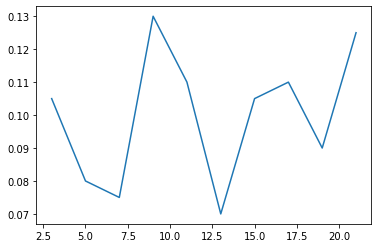

In [86]:
xk = df['x_i']
pk = df['w_i']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm_dist.pmf(xk))

plt.show()

#### Вычисляем моменты

In [87]:
mean = custm_dist.mean()

var = custm_dist.var()

std = custm_dist.std()


pd.DataFrame(data=[[mean, var, std]], 
             columns=['mean',' var', 'std'])

,mean,var,std
0,12.3100,33.7839,5.8124


#### Находим параметры

In [88]:
def calc_eval_param(mean:float, var:float, *args) -> Tuple[float, float]:
    y_1 = simplify(Eq((a + b) / 2, mean))
    y_2 = simplify(Eq((b - a)**2 / 12, var))
    return nonlinsolve((y_1, y_2), (args))

In [79]:
calc_eval_param(mean, var, a, b)

{(2.2426418559783, 22.3773581440217), (22.3773581440217, 2.2426418559783)}

In [89]:
a, b = [float(x) for x in calc_eval_param(mean, var, a, b).args[0]]

a
b

2.242641855978299

22.377358144021702

#### Подставляем параметры в распределение и находим статистики

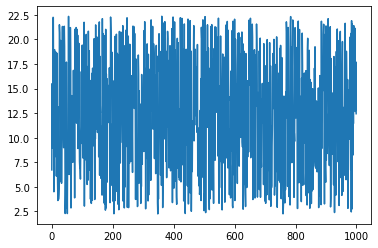

12.360381660281718

33.909571428673914

5.823192546075899

In [157]:
uni_dist = uniform(loc=a, scale=b-a).rvs(size=1000)

fig, ax = plt.subplots(1, 1)
ax.plot(uni_dist)

plt.show()

uni_dist.mean()
uni_dist.var()
uni_dist.std()

In [153]:
np.random.uniform(a, b, 1000).mean()
np.random.uniform(a, b, 1000).var()
np.random.uniform(a, b, 1000).std()

12.320153228195355

33.21176124821471

5.688419121613554